In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [ ]:
data = [['sunny','hot', 'high','False','no'],
        ['sunny','hot', 'high','True','no'],
        ['overcast','hot', 'high','False','yes'],
        ['rainy','mild', 'high','False','yes'],
        ['rainy','cool', 'normal','False','yes'],
        ['rainy','cool', 'normal','True','no'],
        ['overcast','cool', 'normal','True','yes'],
        ['sunny','mild', 'high','False','no'],
        ['sunny','cool', 'normal','False','yes'],
        ['rainy','mild', 'normal','False','yes'],
        ['sunny','mild', 'normal','True','yes'],
        ['overcast','mild', 'high','True','yes'],
        ['overcast','hot', 'normal','False','yes'],
        ['rainy','mild', 'high','True','no'],
        ]
columns = ['overlook','temperature','humidity', 'windy', 'play']

In [ ]:
df = pd.DataFrame(data, columns = columns)
df

,overlook,temperature,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [ ]:
x = df.drop(columns='play', axis = 1)
x

,overlook,temperature,humidity,windy
0,sunny,hot,high,False
1,sunny,hot,high,True
2,overcast,hot,high,False
3,rainy,mild,high,False
4,rainy,cool,normal,False
5,rainy,cool,normal,True
6,overcast,cool,normal,True
7,sunny,mild,high,False
8,sunny,cool,normal,False
9,rainy,mild,normal,False


In [ ]:
one_hot_encoded = pd.get_dummies(df, dtype = float, columns=['overlook','temperature','humidity', 'windy'])
one_hot_encoded

,play,overlook_overcast,overlook_rainy,overlook_sunny,temperature_cool,temperature_hot,temperature_mild,humidity_high,humidity_normal,windy_False,windy_True
0,no,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,no,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,yes,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,yes,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,yes,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
5,no,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
6,yes,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
7,no,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
8,yes,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
9,yes,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [ ]:
tree = DecisionTreeClassifier(criterion='entropy',max_depth=2)
tree

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [ ]:
x = one_hot_encoded.drop(columns = 'play')
y = one_hot_encoded['play']
x,y

(    overlook_overcast  overlook_rainy  overlook_sunny  temperature_cool  \
 0                 0.0             0.0             1.0               0.0   
 1                 0.0             0.0             1.0               0.0   
 2                 1.0             0.0             0.0               0.0   
 3                 0.0             1.0             0.0               0.0   
 4                 0.0             1.0             0.0               1.0   
 5                 0.0             1.0             0.0               1.0   
 6                 1.0             0.0             0.0               1.0   
 7                 0.0             0.0             1.0               0.0   
 8                 0.0             0.0             1.0               1.0   
 9                 0.0             1.0             0.0               0.0   
 10                0.0             0.0             1.0               0.0   
 11                1.0             0.0             0.0               0.0   
 12         

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.67, random_state=10)

In [ ]:
pd.concat([x_train, y_train], axis=1)


,overlook_overcast,overlook_rainy,overlook_sunny,temperature_cool,temperature_hot,temperature_mild,humidity_high,humidity_normal,windy_False,windy_True,play
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,yes
10,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,yes
5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,no
11,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,yes
13,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,no
1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,no
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,no
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,yes
9,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,yes


In [ ]:
pd.concat([x_test, y_test], axis=1)

,overlook_overcast,overlook_rainy,overlook_sunny,temperature_cool,temperature_hot,temperature_mild,humidity_high,humidity_normal,windy_False,windy_True,play
3,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,yes
7,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,no
12,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,yes
6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,yes
8,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,yes


In [ ]:
model = tree.fit(x_train, y_train)

In [ ]:
predicted_values = model.predict(x_test)
predicted_values

array(['no', 'no', 'yes', 'yes', 'yes'], dtype=object)

In [ ]:
y_test

3     yes
7      no
12    yes
6     yes
8     yes
Name: play, dtype: object

In [ ]:
compared_values = zip(predicted_values, y_test)
list(compared_values)

[('no', 'yes'), ('no', 'no'), ('yes', 'yes'), ('yes', 'yes'), ('yes', 'yes')]

In [ ]:
tree.predict_proba(x_test)

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.25, 0.75]])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrices = confusion_matrix(y_test, predicted_values, labels=model.classes_)

In [ ]:
confusion_matrices

array([[1, 0],
       [1, 3]])

In [ ]:
accuracy_score(y_test,predicted_values) * 100

80.0

In [ ]:
from sklearn.metrics import  ConfusionMatrixDisplay, classification_report
from  matplotlib import pyplot as plt

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrices,display_labels=model.classes_)

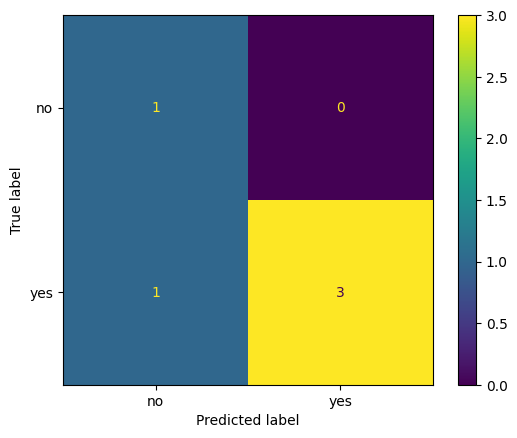

In [ ]:
disp.plot()
plt.show()

In [ ]:
# classification report
print(classification_report(y_test,predicted_values))

              precision    recall  f1-score   support

          no       0.50      1.00      0.67         1
         yes       1.00      0.75      0.86         4

    accuracy                           0.80         5
   macro avg       0.75      0.88      0.76         5
weighted avg       0.90      0.80      0.82         5



[Text(0.6, 0.8333333333333334, 'x[0] <= 0.5\nentropy = 0.991\nsamples = 9\nvalue = [4, 5]'),
 Text(0.4, 0.5, 'x[6] <= 0.5\nentropy = 0.985\nsamples = 7\nvalue = [4, 3]'),
 Text(0.2, 0.16666666666666666, 'entropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.6, 0.16666666666666666, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]')]

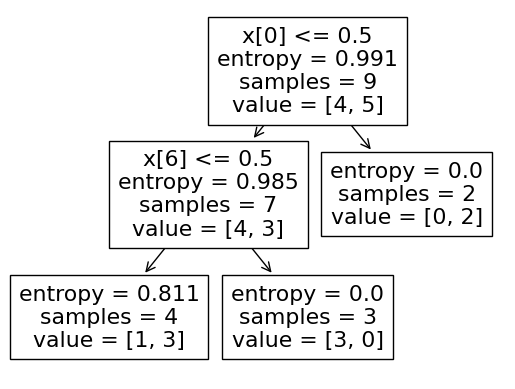

In [ ]:
plot_tree(tree)